In [1]:
import pandas as pd

train_df = pd.read_csv("dev_anon_split/r2_gl_train_statements.csv", sep=';')
test_df = pd.read_csv("dev_anon_split/r2_gl_test_statements.csv", sep=';')

train_df = train_df[['Text', 'Polarity']]
test_df = test_df[['Text', 'Polarity']]

display(train_df)
display(test_df)


,Text,Polarity
0,Eu to vendo na globo e to gostando muito!! O f...,for
1,Acho que já está na hora do Governo e populaçã...,against
2,GEMIDAO AO VIVO NA GLOBO OBG GLOBO,for
3,Tamu junto!!!!!! em Rede Globo TV,for
4,Tudo que engana o povo passa na tela da globo,against
...,...,...
4504,"Segura essa globo ,queremos transparência!!Hip...",against
4505,PESSOAL VEJAM O LIXO DE JORNALISTA QUE TEM A J...,against
4506,"rede Globo, não tá dando pra aguentar vocês co...",for
4507,Esses dias ainda falei sobre a questão da brig...,for


,Text,Polarity
0,A familia da giselly da informação daqui de fo...,against
1,Globo me decepcionou.....to quase chorando aqui,against
2,Lindo de se ver a quebra de monopólios. Que ac...,against
3,se valorizássemos mais nossos ídolos nesse paí...,for
4,"gnt, esse povo da Globo e mt mentiroso",against
...,...,...
1499,"globo ei, bota o Luis roberto pra narrar, já q...",for
1500,só queria que to prestando atenção no filme da...,for
1501,Até a globo a zoando a ressaca do corote KKKKK,for
1502,"Não havendo possibilidade de concorrência, têm...",against


In [2]:
print("\nPolarity distribution in training set:")
print(train_df['Polarity'].value_counts())

print("\nPolarity distribution in test set:") 
print(test_df['Polarity'].value_counts())


Polarity distribution in training set:
Polarity
against    2505
for        2004
Name: count, dtype: int64

Polarity distribution in test set:
Polarity
against    836
for        668
Name: count, dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['Polarity'])
test_df['label'] = label_encoder.transform(test_df['Polarity'])

label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label2id = {k: str(v) for k, v in label2id.items()}
id2label = {v: str(k) for k, v in label2id.items()}
display(train_df)
display(test_df)
display(label2id)
display(id2label)

,Text,Polarity,label
0,Eu to vendo na globo e to gostando muito!! O f...,for,1
1,Acho que já está na hora do Governo e populaçã...,against,0
2,GEMIDAO AO VIVO NA GLOBO OBG GLOBO,for,1
3,Tamu junto!!!!!! em Rede Globo TV,for,1
4,Tudo que engana o povo passa na tela da globo,against,0
...,...,...,...
4504,"Segura essa globo ,queremos transparência!!Hip...",against,0
4505,PESSOAL VEJAM O LIXO DE JORNALISTA QUE TEM A J...,against,0
4506,"rede Globo, não tá dando pra aguentar vocês co...",for,1
4507,Esses dias ainda falei sobre a questão da brig...,for,1


,Text,Polarity,label
0,A familia da giselly da informação daqui de fo...,against,0
1,Globo me decepcionou.....to quase chorando aqui,against,0
2,Lindo de se ver a quebra de monopólios. Que ac...,against,0
3,se valorizássemos mais nossos ídolos nesse paí...,for,1
4,"gnt, esse povo da Globo e mt mentiroso",against,0
...,...,...,...
1499,"globo ei, bota o Luis roberto pra narrar, já q...",for,1
1500,só queria que to prestando atenção no filme da...,for,1
1501,Até a globo a zoando a ressaca do corote KKKKK,for,1
1502,"Não havendo possibilidade de concorrência, têm...",against,0


{'against': '0', 'for': '1'}

{'0': 'against', '1': 'for'}

/home/aluisioamorim/Code/ModernBERTbr/modernBERTbr/.venv/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Train token length stats:
count    4509.000000
mean       26.607008
std        17.285301
min         2.000000
25%        14.000000
50%        22.000000
75%        34.000000
max       146.000000
Name: Text, dtype: float64

Test token length stats:
count    1504.000000
mean       26.702128
std        18.008510
min         3.000000
25%        14.000000
50%        22.000000
75%        34.000000
max       130.000000
Name: Text, dtype: float64

Suggested max_length (95th percentile): 63


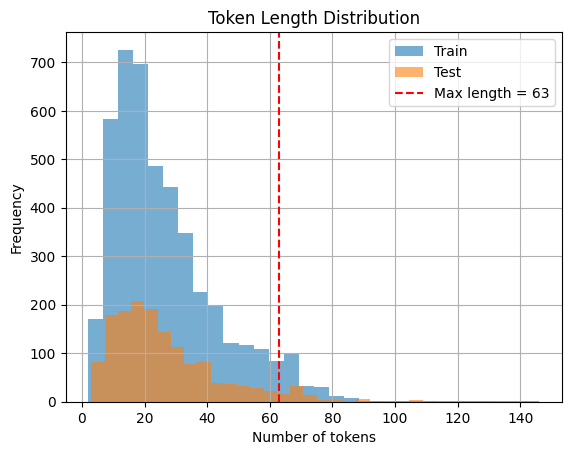

In [4]:
from datasets import Dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

train_dataset = Dataset.from_pandas(train_df[['Text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['Text', 'label']])

tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

train_token_lengths = train_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))
test_token_lengths = test_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))

print("Train token length stats:")
print(train_token_lengths.describe())
print("\nTest token length stats:")
print(test_token_lengths.describe())

suggested_max_len = int(train_token_lengths.quantile(0.95))
print(f"\nSuggested max_length (95th percentile): {suggested_max_len}")

plt.hist(train_token_lengths, bins=30, alpha=0.6, label='Train')
plt.hist(test_token_lengths, bins=30, alpha=0.6, label='Test')
plt.axvline(suggested_max_len, color='red', linestyle='--', label=f'Max length = {suggested_max_len}')
plt.title("Token Length Distribution")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def tokenize_function(example):
    return tokenizer(example['Text'], truncation=True, padding='max_length', max_length=74)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 1504/1504 [00:00<00:00, 41118.22 examples/s]


In [6]:
from transformers.models.modernbert import ModernBertForSequenceClassification

model = ModernBertForSequenceClassification.from_pretrained(
    './modernbert-br/checkpoint-60000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at ./modernbert-br/checkpoint-60000 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1317020/2673190351.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.727200
20,0.689000
30,0.645400
40,0.613700
50,0.597700
60,0.595100
70,0.579600
80,0.499400
90,0.507500
100,0.482700


TrainOutput(global_step=213, training_loss=0.5171567968359576, metrics={'train_runtime': 54.7305, 'train_samples_per_second': 247.157, 'train_steps_per_second': 3.892, 'total_flos': 666206879582664.0, 'train_loss': 0.5171567968359576, 'epoch': 3.0})

In [8]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))



Accuracy: 0.7600

Classification Report:
              precision    recall  f1-score   support

     against       0.76      0.83      0.79       836
         for       0.76      0.68      0.71       668

    accuracy                           0.76      1504
   macro avg       0.76      0.75      0.75      1504
weighted avg       0.76      0.76      0.76      1504



In [9]:
from transformers.models.bert import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    './bert-br/checkpoint-75000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./bert-br/checkpoint-75000 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1317020/2673190351.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.627900
20,0.523500
30,0.497400
40,0.467900
50,0.493300
60,0.471200
70,0.467800
80,0.359600
90,0.368400
100,0.368700


TrainOutput(global_step=213, training_loss=0.38192799841294267, metrics={'train_runtime': 38.848, 'train_samples_per_second': 348.203, 'train_steps_per_second': 5.483, 'total_flos': 514401641002440.0, 'train_loss': 0.38192799841294267, 'epoch': 3.0})

In [11]:
# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))



Accuracy: 0.8231

Classification Report:
              precision    recall  f1-score   support

     against       0.83      0.85      0.84       836
         for       0.81      0.79      0.80       668

    accuracy                           0.82      1504
   macro avg       0.82      0.82      0.82      1504
weighted avg       0.82      0.82      0.82      1504

